# Remaining Useful Life Prediction - Suile

In [1]:
!pip install sulie


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
API_KEY = 'sulie-b08e8067d49040bbbf43c68feb36438c'

In [5]:
import os
import pandas as pd
from sulie import Sulie

client = Sulie(
    api_key=API_KEY
)

# Prepare your data
df = pd.DataFrame({
    "timestamp": pd.date_range(start='2023-01-01', periods=1000, freq='H'),
    "solar_demand": [100 + i % 50 for i in range(1000)],  # Sample solar energy demand
    "location": ["Plant A" if i % 2 == 0 else "Plant B" for i in range(1000)]  # Alternating locations
})

# Upload a dataset
dataset = client.upload_dataset(
    name="solar-power-demand", 
    df=df
)


Uploading dataset solar-power-demand: 100%|██████████| 1.00/1.00 [00:01<00:00, 1.53s/B]


In [7]:
# Forecast on time-series data                                                           
forecast = client.forecast(
    dataset=df,
    target="solar_demand",
    group_by="location",
    date="timestamp",
    aggr="mean",
    horizon=24,  # Forecast the next 24 hours
)

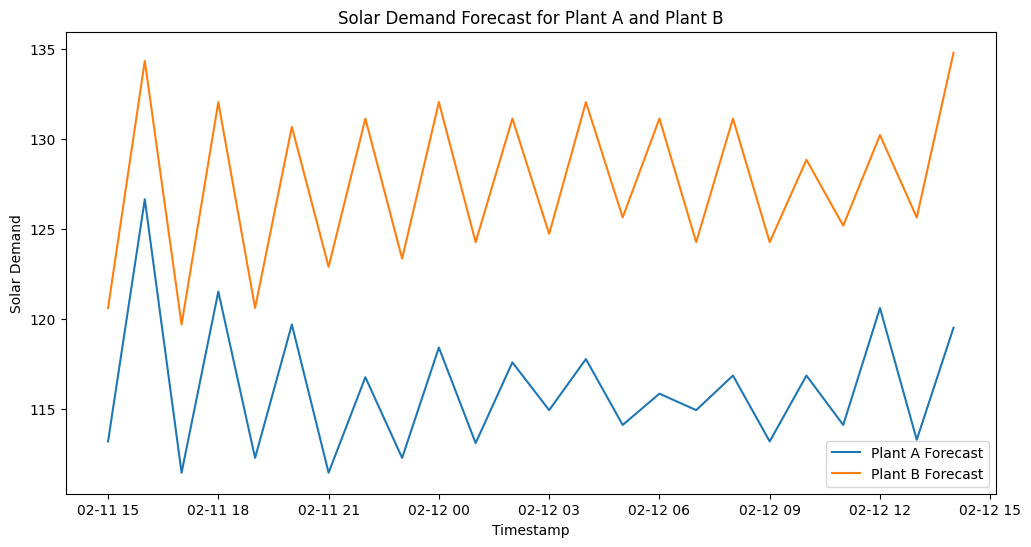

In [10]:
import matplotlib.pyplot as plt

# Assuming forecast is a list of lists with forecasted values for each location
forecast_plant_a = forecast[0][0]
forecast_plant_b = forecast[0][1]

# Create a time range for the forecast
forecast_time_range = pd.date_range(start=df['timestamp'].iloc[-1], periods=len(forecast_plant_a), freq='H')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_time_range, forecast_plant_a, label='Plant A Forecast')
plt.plot(forecast_time_range, forecast_plant_b, label='Plant B Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Solar Demand')
plt.title('Solar Demand Forecast for Plant A and Plant B')
plt.legend()
plt.show()